# Теория

Предположим, что некая популяция, состоящая из N особей, (считаем, что популяция изолирована) подразделяется на три группы. Первая группа - $S(t)$ — восприимчивые к болезни, но пока здоровые особи. Вторая - $I(t)$ — это число инфицированных особей, которые также при этом являются распространителями инфекции. И третья - $R(t)$ — это здоровые особи с иммунитетом к болезни. 

До того, как число заболевших не превышает критического значения $I^*$ считаем, что все больные изолированы и не заражают здоровых. Когда $I(t)>I^*$, тогда инфицирование способны заражать восприимчивых к болезни особей.

Таким образом, скорость изменения числа S(t) меняется по следующему закону:

$$ \frac{\partial S}{\partial t} = \begin{cases} - \alpha S, если I(t)>I^* \\ 0, если I(t) \leq I^* \end{cases}$$

Поскольку каждая восприимчивая к болезни особь, которая, в конце концов, заболевает, сама становится инфекционной, то скорость изменения числа инфекционных особей представляет разность за единицу времени между заразившимися и теми, кто уже болеет и лечится, т.е.:

$$ \frac{\partial I}{\partial t} = \begin{cases} - \alpha S - \beta I, если I(t)>I^* \\ - \beta I, если I(t) \leq I^* \end{cases}$$

А скорость изменения выздоравливающих особей (при этом приобретающие иммунитет к болезни)

$$ \frac{\partial R}{\partial t} = \beta I$$

Постоянные пропорциональности $\alpha$ и $\beta$ — коэффициент заболеваемости и коэффициент выздоровления соответственно.

Для анализа картины протекания эпидемии необходимо рассмотреть два случая: $ I(0) \leq I^* $ и $ I(0) > I^* $

In [1]:
STUD = 1032182533
def variant(stud):
    print(stud%70 + 1)
variant(STUD)

54


На одном острове вспыхнула эпидемия. Известно, что из всех проживающих на острове $(N=8439)$ в момент начала эпидемии $(t=0)$ число заболевших людей
(являющихся распространителями инфекции) $I(0)=86$, А число здоровых людей с
иммунитетом к болезни $R(0)=25$. Таким образом, число людей восприимчивых к
болезни, но пока здоровых, в начальный момент времени $S(0)=N-I(0)- R(0)$.  
Постройте графики изменения числа особей в каждой из трех групп.
Рассмотрите, как будет протекать эпидемия в случае:
1. если $ I(0) \leq I^* $ 
2. если $ I(0) > I^* $

$$ \alpha = 0.35 $$
$$ \beta = 0.13 $$

In [2]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [43]:
a = 0.5 # коэффициент заболеваемости

In [44]:
b = 0.01 # коэффициент выздоровления

In [45]:
N = 8439 # общая численность популяции

In [46]:
I0 = 86 # количество инфицированных особей в начальный момент времени

In [47]:
R0 = 25 # количество здоровых особей с иммунитетом в начальный момент времени

In [48]:
S0 = N - I0 - R0 # количество восприимчивых к болезни особей в начальный момент времени
S0

8328

## Случай, когда $ I(0) \leq I^* $

In [49]:
def syst(x, t):
    dx0 = 0
    dx1 = - b*x[1]
    dx2 = b*x[1]
    return dx0, dx1, dx2

In [50]:
x0 = [S0, I0, R0] # начальные значения

In [59]:
t = np.arange(0, 500, 0.01)

In [60]:
y = odeint(syst, x0, t)

### Построение динамики изменения числа особей в каждой из трех групп

In [61]:
def cm_to_inch(value):
    return value/2.54

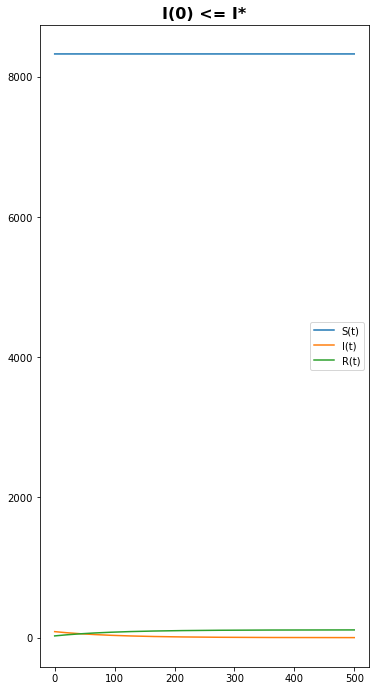

In [62]:
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(30)))
plt.plot(t, y[:,0], label='S(t)')
plt.plot(t, y[:,1], label='I(t)')
plt.plot(t, y[:,2], label='R(t)')
plt.title('I(0) <= I*', fontsize=16, fontweight=1000)
plt.legend()

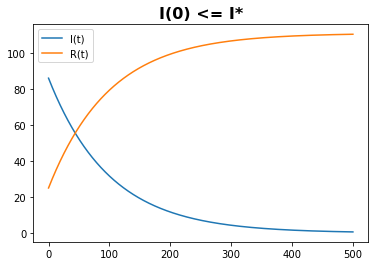

In [63]:
plt.plot(t, y[:,1], label='I(t)')
plt.plot(t, y[:,2], label='R(t)')
plt.title('I(0) <= I*', fontsize=16, fontweight=1000)
plt.legend()

## Случай, когда $ I(0) > I^*$

In [64]:
def syst2(x, t):
    ddx0 = -a*x[0]
    ddx1 = a*x[0] - b*x[1]
    ddx2 = b*x[1]
    return ddx0, ddx1, ddx2

In [65]:
yy = odeint(syst2, x0, t)

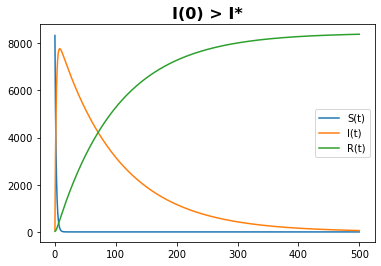

In [66]:
plt.plot(t, yy[:,0], label='S(t)')
plt.plot(t, yy[:,1], label='I(t)')
plt.plot(t, yy[:,2], label='R(t)')
plt.title('I(0) > I*', fontsize=16, fontweight=1000)
plt.legend()